In [4]:
import os
os.chdir("C:\\Users\\Kunal\\Desktop\\MLCourse\\Case Studies\\Human Activity Recognition")

In [38]:
import numpy as np
import pandas as pd

f = open(".\\UCI HAR Dataset\\UCI HAR Dataset\\features.txt", "r")

line = f.readline()
feature_names = []

while line: 
    feature_name = list(filter(lambda x: len(x) > 0, line.split(' ')))[1].strip()
    feature_name_modified = feature_name.replace('-', '').replace('()', '').replace(',', '')
    feature_names.append(feature_name_modified)
    line = f.readline()
    
f.close()

In [49]:
def get_x_data(path):
    f = open(path, "r")
    rows = []
    line = f.readline()

    while line: 
        splits = line.split(' ')
        filtered = list(filter(lambda x: len(x) > 0, splits))
        trimmed_and_filtered = list(map(lambda x: x.strip(), filtered))
        assert(len(trimmed_and_filtered) == 561)
        rows.append(trimmed_and_filtered)
        line = f.readline()

    f.close()
    return rows

def get_y_data(path):
    f = open(path, 'r')

    line = f.readline()
    y_data = []

    while line:
        splits = line.split(' ')
        y_value = splits[0].replace('\n', '')
        y_data.append(int(y_value))
        line = f.readline()
    
    return y_data

In [ ]:
train_rows = get_x_data('.\\UCI HAR Dataset\\UCI HAR Dataset\\train\\X_train.txt')
x_train = pd.DataFrame(train_rows, columns = feature_names) 
x_train.head()

In [56]:
test_rows = get_x_data('.\\UCI HAR Dataset\\UCI HAR Dataset\\test\\X_test.txt')
x_test = pd.DataFrame(test_rows, columns = feature_names) 
x_test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angle(tBodyAccMeangravity),angle(tBodyAccJerkMean)gravityMean),angle(tBodyGyroMeangravityMean),angle(tBodyGyroJerkMeangravityMean),angle(XgravityMean),angle(YgravityMean),angle(ZgravityMean)
0,2.5717778e-001,-2.3285230e-002,-1.4653762e-002,-9.3840400e-001,-9.2009078e-001,-6.6768331e-001,-9.5250112e-001,-9.2524867e-001,-6.7430222e-001,-8.9408755e-001,...,7.1645446e-002,-3.3037044e-001,-7.0597388e-001,6.4624029e-003,1.6291982e-001,-8.2588562e-001,2.7115145e-001,-7.2000927e-001,2.7680104e-001,-5.7978304e-002
1,2.8602671e-001,-1.3163359e-002,-1.1908252e-001,-9.7541469e-001,-9.6745790e-001,-9.4495817e-001,-9.8679880e-001,-9.6840133e-001,-9.4582340e-001,-8.9408755e-001,...,-4.0118872e-001,-1.2184509e-001,-5.9494387e-001,-8.3494968e-002,1.7499572e-002,-4.3437455e-001,9.2059323e-001,-6.9809082e-001,2.8134292e-001,-8.3898014e-002
2,2.7548482e-001,-2.6050420e-002,-1.1815167e-001,-9.9381904e-001,-9.6992551e-001,-9.6274798e-001,-9.9440345e-001,-9.7073498e-001,-9.6348267e-001,-9.3926027e-001,...,6.2891313e-002,-1.9042189e-001,-6.4073573e-001,-3.4956250e-002,2.0230203e-001,6.4103354e-002,1.4506843e-001,-7.0277146e-001,2.8008303e-001,-7.9346197e-002
3,2.7029822e-001,-3.2613869e-002,-1.1752018e-001,-9.9474279e-001,-9.7326761e-001,-9.6709068e-001,-9.9527433e-001,-9.7447101e-001,-9.6889736e-001,-9.3860975e-001,...,1.1669529e-001,-3.4441804e-001,-7.3612380e-001,-1.7067021e-002,1.5443783e-001,3.4013408e-001,2.9640709e-001,-6.9895383e-001,2.8411379e-001,-7.7108002e-002
4,2.7483295e-001,-2.7847788e-002,-1.2952716e-001,-9.9385248e-001,-9.6744548e-001,-9.7829499e-001,-9.9411140e-001,-9.6595259e-001,-9.7734600e-001,-9.3860975e-001,...,-1.2171128e-001,-5.3468487e-001,-8.4659517e-001,-2.2226521e-003,-4.0046393e-002,7.3671509e-001,-1.1854473e-001,-6.9224496e-001,2.9072202e-001,-7.3856810e-002


In [57]:
y_train = get_y_data('.\\UCI HAR Dataset\\UCI HAR Dataset\\train\\Y_train.txt')
y_test = get_y_data('.\\UCI HAR Dataset\\UCI HAR Dataset\\test\\Y_test.txt')

In [69]:
%matplotlib inline
import time
from sklearn.manifold import TSNE
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

def perform_tsne(perp, y_train):
    start_time = time.time()
    tsne = TSNE(n_components = 2, verbose = 1, perplexity = 5)
    tsne_transformed = tsne.fit_transform(x_train)
    time_taken = time.time() - start_time        
    print('Time to perform tsne with perplexity = ' + str(perp) + ' : ' + str(time_taken) + ' seconds')
    df = pd.DataFrame({'x_tsne': tsne_transformed[:, 0], 'y_tsne': tsne_transformed[:, 1], 'label': y_train})
    sns.lmplot(data = df, x = 'x_tsne', y = 'y_tsne', hue = 'label', fit_reg = False, size = 8)
    plt.title('Perplexity: ' + str(perp))
    plt.show()

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.620s...
[t-SNE] Computed neighbors for 7352 samples in 67.648s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.951004
[t-SNE] Error after 1000 iterations: 1.566673
Time to perform tsne with perplexity = 5 : 386.1202507019043 seconds


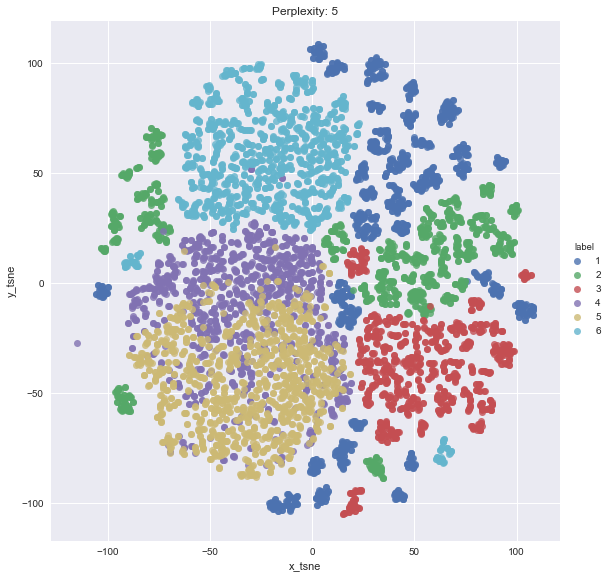

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.901s...
[t-SNE] Computed neighbors for 7352 samples in 97.260s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.889404
[t-SNE] Error after 1000 iterations: 1.566289
Time to perform tsne with perplexity = 10 : 401.56416034698486 seconds


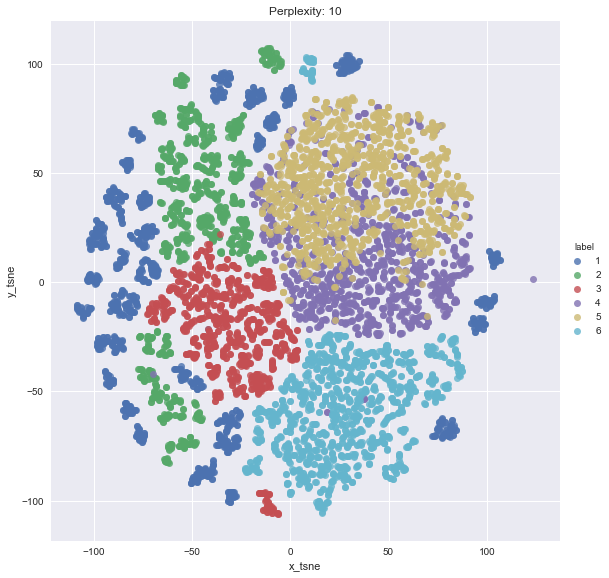

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.659s...
[t-SNE] Computed neighbors for 7352 samples in 69.806s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.994850
[t-SNE] Error after 1000 iterations: 1.567945
Time to perform tsne with perplexity = 20 : 324.83343744277954 seconds


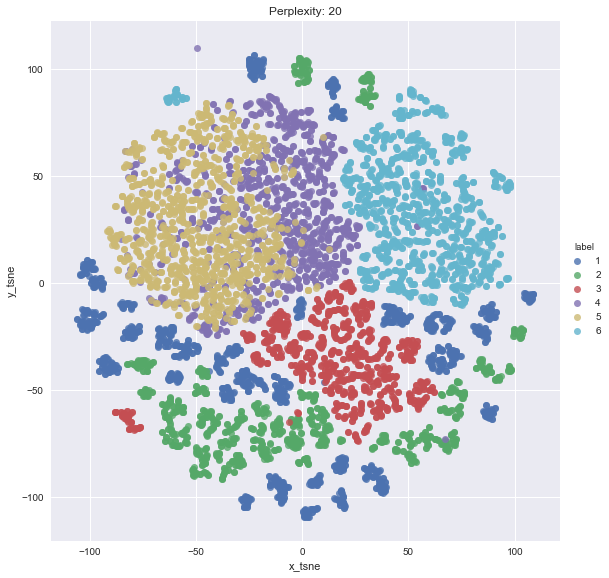

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.664s...
[t-SNE] Computed neighbors for 7352 samples in 66.951s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.164444
[t-SNE] Error after 1000 iterations: 1.572626
Time to perform tsne with perplexity = 40 : 346.5700685977936 seconds


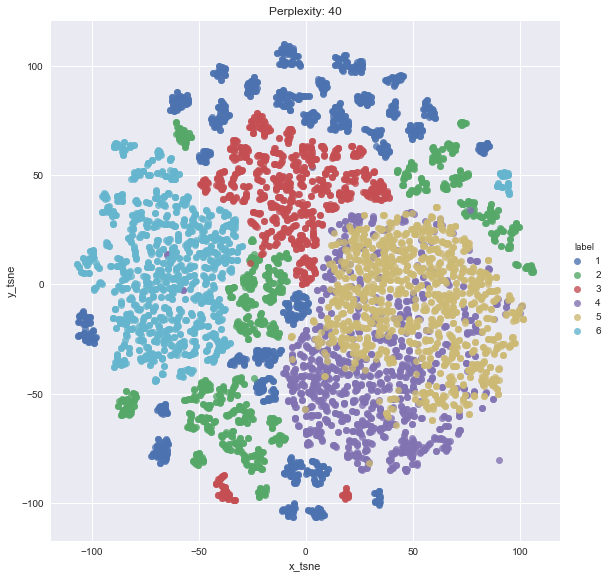

In [70]:
perplexities = [5, 10, 20, 40]

for perp in perplexities:
    perform_tsne(perp, y_train)

In [ ]:
# BUILDING MODELS

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time

summary_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Time (seconds)'])

accuracies = {}
confusion_matrices = {}
times = {}

def perform_grid_search(model_name, grid_search, x_train, y_train, x_test, y_test):
    global summary_df
    start_time = time.time()
    grid_search.fit(x_train, y_train)
    time_taken = time.time() - start_time
    y_pred = grid_search.predict(x_test)
    confusion_matrix_1 = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy
    confusion_matrices[model_name] = confusion_matrix_1
    times[model_name] = time_taken
    row = {'Model' : model_name, 'Accuracy': accuracy, 'Time (seconds)': time_taken}
    summary_df = summary_df.append(row, ignore_index = True)

In [91]:
def print_results(model_name, grid_search):  
    print('-------------------------------------------------')
    print('Results for model: {}'.format(model_name))
    print('Best estimators: {}'.format(grid_search.best_estimator_))
    print(summary_df.loc[summary_df['Model'] == model_name])
    print('-------------------------------------------------')

In [92]:
# Logistic Regression    
model_name = 'LogisticRegression'

grid_search_params = {'penalty': ['l2', 'l1'], 'C': [0.01, 0.1, 1, 10, 20, 30, 100]} 

model = LogisticRegression()
grid_search = GridSearchCV(model, grid_search_params, verbose = 1)
perform_grid_search(model_name, grid_search, x_train, y_train, x_test, y_test)
print_results(model_name, grid_search)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed: 10.5min finished


-------------------------------------------------
Results for model: LogisticRegression
Best estimators: LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
                Model  Accuracy  Time (seconds)
0  LogisticRegression  0.963013      653.283989
-------------------------------------------------


In [94]:
# Linear SVM
from sklearn.svm import LinearSVC

model_name = 'LinearSVC'
grid_search_params = {'C': [0.01, 0.1, 1, 10, 20, 30, 100]} 

model = LinearSVC()
grid_search = GridSearchCV(model, grid_search_params, verbose = 1)
perform_grid_search(model_name, grid_search, x_train, y_train, x_test, y_test)
print_results(model_name, grid_search)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  3.7min finished


-------------------------------------------------
Results for model: LinearSVC
Best estimators: LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
       Model  Accuracy  Time (seconds)
1  LinearSVC  0.966067      237.151589
-------------------------------------------------


In [95]:
# RBF SVM
from sklearn.svm import SVC

model_name = 'RBFSVC'
grid_search_params = {'C': [0.01, 0.1, 1, 10, 20, 30, 100], 'gamma': [0.01, 0.1, 1, 2]}

model = SVC()
grid_search = GridSearchCV(model, grid_search_params, verbose = 1, n_jobs = -1)
perform_grid_search(model_name, grid_search, x_train, y_train, x_test, y_test)
print_results(model_name, grid_search)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed: 95.9min finished


-------------------------------------------------
Results for model: RBFSVC
Best estimators: SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
    Model  Accuracy  Time (seconds)
2  RBFSVC  0.964371     5762.188225
-------------------------------------------------


In [96]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier

model_name = 'DecisionTrees'
grid_search_params = {'criterion': ['gini', 'entropy'],  'max_depth': np.arange(3, 10)}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, grid_search_params, verbose = 1)
perform_grid_search(model_name, grid_search, x_train, y_train, x_test, y_test)
print_results(model_name, grid_search)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:  6.7min finished


-------------------------------------------------
Results for model: DecisionTrees
Best estimators: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
           Model  Accuracy  Time (seconds)
3  DecisionTrees  0.845945      414.298757
-------------------------------------------------


In [99]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model_name = 'RandomForest'
grid_search_params = {'n_estimators': np.arange(10, 201, 20), 'max_depth': np.arange(5, 10, 2)}

model = RandomForestClassifier()
grid_search = GridSearchCV(model, grid_search_params, verbose = 1, n_jobs = -1)
perform_grid_search(model_name, grid_search, x_train, y_train, x_test, y_test)
print_results(model_name, grid_search)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 10.9min finished


-------------------------------------------------
Results for model: RandomForest
Best estimators: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
          Model  Accuracy  Time (seconds)
4  RandomForest  0.910757      676.414387
-------------------------------------------------


In [100]:
# GBDT
from sklearn.ensemble import GradientBoostingClassifier

model_name = 'GBDT'
grid_search_params = {'n_estimators': np.arange(50, 201, 20), 'max_depth': np.arange(5, 11, 2)}

model = GradientBoostingClassifier()
grid_search = GridSearchCV(model, grid_search_params, verbose = 1, n_jobs = -1)
perform_grid_search(model_name, grid_search, x_train, y_train, x_test, y_test)
print_results(model_name, grid_search)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 90.8min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 153.4min finished


-------------------------------------------------
Results for model: GBDT
Best estimators: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=170,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
  Model  Accuracy  Time (seconds)
5  GBDT  0.923312    10064.316218
-------------------------------------------------


In [101]:
summary_df

,Model,Accuracy,Time (seconds)
0,LogisticRegression,0.963013,653.283989
1,LinearSVC,0.966067,237.151589
2,RBFSVC,0.964371,5762.188225
3,DecisionTrees,0.845945,414.298757
4,RandomForest,0.910757,676.414387
5,GBDT,0.923312,10064.316218
